In [74]:
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier



In [75]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline



df=pd.read_csv('data/preprocess.csv')

y = np.array(df['shot_made_flag']).astype(int)
X = df.drop('shot_made_flag', 1)


cat_ftrs = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y','playoffs','home_play']

cont_ftrs1 = ['shot_distance', 'time_remaining']

X[cont_ftrs1] = X[cont_ftrs1].astype(float)
y = y.astype(float)

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# one-hot encoder

ohe = OneHotEncoder(sparse=False)
cat_values = ohe.fit_transform(X[cat_ftrs])
cat_ftr_names = ohe.get_feature_names(cat_ftrs)
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)




X_process = pd.concat([df_cat,X[cont_ftrs1]],axis=1)

ss = StandardScaler()
X_process[cont_ftrs1] = ss.fit_transform(X_process[cont_ftrs1])
#df_cont1 = pd.DataFrame(data=count_values,columns = cont_ftrs1)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_process, y, 
                                                    test_size=0.20, random_state=50)



In [78]:
scaler = StandardScaler()
X_train[cont_ftrs1] = scaler.fit_transform(X_train[cont_ftrs1])
X_test[cont_ftrs1] = scaler.transform(X_test[cont_ftrs1])

## Tune RandomForest

In [71]:
#GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100,
                                                            random_state=random_state))])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__max_features': ['sqrt'],
        'classifier__min_samples_split':[100,250,500] ,
        }
#np.arange(500,600,20)
    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)

In [72]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

{'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 600}
best CV score: 0.67840638225422
test score: 0.6797665369649806
{'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 600}
best CV score: 0.6778712847205332
test score: 0.6832684824902724
{'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 600}
best CV score: 0.680789998540643
test score: 0.6784046692607004
{'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 600}
best CV score: 0.6800603200856156
test score: 0.6750972762645915
{'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 600}
best CV score: 0.6783090917935496
test score: 0.6815175097276265
{'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 600}
best CV score: 0.6799630296249453
test score: 0.6756809338521401
{'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 800}
best CV score: 0.6806927080799727
test score: 0.6776264591439689
{'classifier__max_featu

## Tune AdaBoost

In [17]:


#GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', AdaBoostClassifier())])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__n_estimators': np.arange(2,102,10),
        }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)



In [18]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),3),'+/-',np.around(np.std(test_scores),4))

{'classifier__n_estimators': 52}
best CV score: 0.6796225130125991
test score: 0.6859922178988327
{'classifier__n_estimators': 32}
best CV score: 0.6804494819282969
test score: 0.6867704280155642
{'classifier__n_estimators': 82}
best CV score: 0.6816169674563409
test score: 0.6797665369649806
{'classifier__n_estimators': 32}
best CV score: 0.6820061292990223
test score: 0.6803501945525292
{'classifier__n_estimators': 22}
best CV score: 0.6814710317653354
test score: 0.682295719844358
{'classifier__n_estimators': 52}
best CV score: 0.6820547745293574
test score: 0.6795719844357977
{'classifier__n_estimators': 72}
best CV score: 0.6818115483776815
test score: 0.6787937743190662
{'classifier__n_estimators': 32}
best CV score: 0.6802549010069563
test score: 0.6857976653696498
{'classifier__n_estimators': 52}
best CV score: 0.68283309821472
test score: 0.6754863813229572
{'classifier__n_estimators': 22}
best CV score: 0.6814223865350002
test score: 0.6842412451361868
test accuracy: 0.682 +/

## Tune GradientBoosting

In [27]:
#GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=50)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier())])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__max_depth': [np.arange(1,3)],
        'classifier__min_samples_split': np.arange(2,80,4),
        }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)



In [28]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),4),'+/-',np.around(np.std(test_scores),4))

{'classifier__max_depth': 2, 'classifier__min_samples_split': 38}
best CV score: 0.6792333511699178
test score: 0.6830739299610895
{'classifier__max_depth': 2, 'classifier__min_samples_split': 50}
best CV score: 0.6795738677822639
test score: 0.6867704280155642
{'classifier__max_depth': 1, 'classifier__min_samples_split': 6}
best CV score: 0.6809845794619838
test score: 0.6803501945525292
{'classifier__max_depth': 2, 'classifier__min_samples_split': 46}
best CV score: 0.6814223865350002
test score: 0.6778210116731518
{'classifier__max_depth': 2, 'classifier__min_samples_split': 38}
best CV score: 0.6803521914676266
test score: 0.6817120622568094
{'classifier__max_depth': 2, 'classifier__min_samples_split': 22}
best CV score: 0.6810818699226541
test score: 0.6787937743190662
{'classifier__max_depth': 2, 'classifier__min_samples_split': 46}
best CV score: 0.6813250960743299
test score: 0.6787937743190662
{'classifier__max_depth': 2, 'classifier__min_samples_split': 50}
best CV score: 0.6

## Extra Tree

In [25]:
#GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score


def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent', 'loc_x', 'loc_y']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', ExtraTreesClassifier())])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__max_features': ['sqrt','log2'],
        'classifier__min_samples_split': np.arange(2,80,4),
        }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)



In [26]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),4),'+/-',np.around(np.std(test_scores),4))

{'classifier__max_features': 'log2', 'classifier__min_samples_split': 78}
best CV score: 0.6758768302767914
test score: 0.677431906614786
{'classifier__max_features': 'log2', 'classifier__min_samples_split': 54}
best CV score: 0.6762173468891375
test score: 0.6863813229571984
{'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 74}
best CV score: 0.6788928345575717
test score: 0.6657587548638132
{'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 74}
best CV score: 0.6770929610351705
test score: 0.6756809338521401
{'classifier__max_features': 'log2', 'classifier__min_samples_split': 54}
best CV score: 0.6768010896531595
test score: 0.6750972762645915
{'classifier__max_features': 'log2', 'classifier__min_samples_split': 58}
best CV score: 0.6776767037991925
test score: 0.6700389105058365
{'classifier__max_features': 'log2', 'classifier__min_samples_split': 66}
best CV score: 0.6759254755071266
test score: 0.6714007782101167
{'classifier__max_features':

## XGBoost

In [80]:
df=pd.read_csv('data/preprocess.csv')

y = np.array(df['shot_made_flag']).astype(int)
X = df.drop('shot_made_flag', 1)
X=X.drop('loc_x', axis=1)
X=X.drop('loc_y', axis=1)


cat_ftrs = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent','playoffs','home_play']

cont_ftrs1 = ['shot_distance', 'time_remaining']

X[cont_ftrs1] = X[cont_ftrs1].astype(float)
y = y.astype(float)

In [81]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# one-hot encoder

ohe = OneHotEncoder(sparse=False)
cat_values = ohe.fit_transform(X[cat_ftrs])
cat_ftr_names = ohe.get_feature_names(cat_ftrs)
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)




X_process = pd.concat([df_cat,X[cont_ftrs1]],axis=1)

ss = StandardScaler()
X_process[cont_ftrs1] = ss.fit_transform(X_process[cont_ftrs1])
#df_cont1 = pd.DataFrame(data=count_values,columns = cont_ftrs1)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_process, y, 
                                                    test_size=0.20, random_state=50)



In [83]:
scaler = StandardScaler()
X_train[cont_ftrs1] = scaler.fit_transform(X_train[cont_ftrs1])
X_test[cont_ftrs1] = scaler.transform(X_test[cont_ftrs1])

In [84]:
#GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

def ML_pipeline_kfold_GridSearchCV(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state,stratify=y)
    # splitter for _other
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    numeric_features = ['shot_distance', 'time_remaining']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_features = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
    'month', 'opponent']
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])    
    
    # the parameter(s) we want to tune

    param_grid = {
        'classifier__max_depth ': np.linspace(3,8,6).astype(int),
        'classifier__learning_rate ': np.logspace(-3,0,10),
        'classifier__gamma ': np.logspace(-2,2,10),
        'classifier__reg_alpha ': np.logspace(-2,2,10),
        'classifier__reg_lambda ': np.logspace(-2,2,10),
        'classifier__colsample_bytree ': np.logspace(-5,0,6),
        'classifier__colsample_level ': np.logspace(-5,0,6),
        'classifier__scale_pos_weight ': np.logspace(-5,0,6),
        }

    # prepare gridsearch
    grid = GridSearchCV(clf, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,iid=True)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    return grid, grid.score(X_test, y_test)



In [51]:
test_scores = []
for i in range(10):
    grid, test_score = ML_pipeline_kfold_GridSearchCV(X,y,i*50,5)
    print(grid.best_params_)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    test_scores.append(test_score)
print('test accuracy:',np.around(np.mean(test_scores),4),'+/-',np.around(np.std(test_scores),4))

KeyboardInterrupt: 

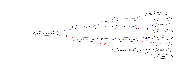

In [147]:
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

X_train.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)


model = XGBClassifier(max_depth=3)

# Train
model = model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(2.5, 0.7))
fig = plt.gcf()
fig.set_size_inches(2.5, 1)
xgb.plot_tree(model._Booster, num_trees=3, ax=ax, rankdir='LR')
plt.savefig('figures/xgb_tree6.pdf',dpi=10000)
plt.show()
